## Семинар 13
# Тема: Кластеризация

_Кластеризация_ относится к методам обучения без учителя. 

Задача кластеризации состоит в разбиении множества исходных объектов на подмножества близких по свойствам объектов. Понятие _близости_ формализуется при помощи задания _метрики_, или расстояния между объектами $\rho\left(x_i,x_j\right)$. 

### Метод k-means.
Познакомимся с одним из наиболее известных алгоритмов кластеризации: _k-means_ или _k средних_. 

Алгоритм метода выглядит следующим образом:

1. Случайным образом выбираются k точек $x_k \in X$, в дальнейшем будем называть их центрами кластеров (центроидами);

2. Для каждой точки $x_i \in X$ вычисляется $\rho\left(x_i,x_k\right)$, после чего ей ставится в соответствие  ближайший к ней центр кластера. Совокупность точек, отнесённых к центру $x_k$ называется кластером;

3. Вычисляются средние взвешенные точек (центры масс), принадлежащих к определённому кластеру. Эти значения становятся новыми центрами кластеров;

4. Шаги 2 и 3 повторяются до тех пор, пока пересчёт центров кластеров будет существенно менять местоположение кластеров. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.

Следует иметь в виду, что этот алгоритм хорошо работает только для нормальных выборок, причем кластеры не должны существенно перекрываться.

Недостатком алгоритма является то, что число кластеров в нем - гиперпараметр, т.е. должно быть задано изначально.


### Метод DBSCAN.

Познакомиться с методом машинного обучения DBSCAN, осуществляющим группировку наблюдений в кластеры высокой плотности.

DBSCAN имеет три основных устанавливаемых параметра:

♦ eps — максимальное расстояние от наблюдения, чтобы считать другое наблюдение его соседом;

♦ min sampies — минимальное число наблюдений, находящихся на расстоянии менее eps от наблюдения, для того чтобы его можно было считать ключевым наблюдением;

♦ metric— метрический показатель расстояния, используемый параметром eps, 
например minkowski или euclidean (обратите внимание, что если используется
расстояние Минковского, то может быть использован параметр р для установки
мощности метрического показателя Минковского).

Наблюдения подразделяются на три типа точек:

1. Центральная точка (точка данных является центральной, если круг радиуса eps вокруг нее содержит не менее min_sampies точек)

2. Граничная точка (количество точек меньше min_sampies, но есть хотя бы одна центральная)

3. Шум (нет ни одной центральной точки в круге радиуса eps вокруг нее)

Алгоритм хорошо работает с кластерами произвольной формы, число кластеров определяется в ходе работы алгоритма, а не задаётся, как гиперпараметр. Хуже работает на данных с разной плотностью.

Silhouette Score — это метрика для оценки качества результатов кластеризации. Она измеряет, насколько точка данных похожа на собственный кластер по сравнению с другими кластерами. Оценка варьируется от –1 до 1, где более высокое значение указывает на лучшую производительность кластеризации. Значение, близкое к 1, предполагает, что точки данных хорошо кластеризованы и правильно разделены, а значение, близкое к -1, указывает на то, что точки данных могли быть отнесены к неправильным кластерам. В коде Silhouette Score рассчитывается с помощью функции silhouette_score().

Загрузим необходимые библиотеки:

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Метод k-means.

### 1. Сформируйте данные при помощи make_blobs(n_samples=1000, centers=5, random_state=10). Выведите полученные данные в виде датафрейма, дав названия колонкам X1 и  X2. Визуализируйте их при помощи диаграммы рассеяния.

In [44]:
data, _ = make_blobs(n_samples=1000, centers=5, random_state=42)
df = pd.DataFrame(data, columns=['X1','X2'])
df.head()

,X1,X2
0,5.020077,2.583755
1,3.232367,1.195353
2,-6.107928,-9.728652
3,5.199669,3.053950
4,1.380819,4.593374


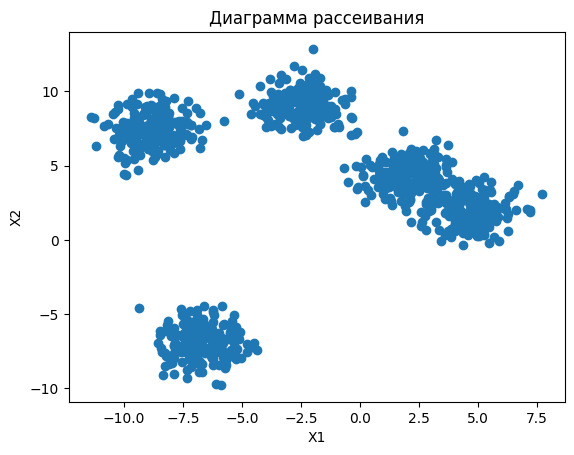

In [45]:
plt.scatter(df['X1'], df['X2'])
plt.title('Диаграмма рассеивания')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Масштабируйте данные при помощи MinMaxScaler.

In [46]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()

,X1,X2
0,0.858789,0.545860
1,0.765246,0.484544
2,0.276507,0.002107
3,0.868186,0.566625
4,0.668362,0.634611


### 3. Создайте экземпляр класса k-средних с пятью кластерами, зафиксировав random_state = 42. Обучите эту модель на масштабированных данных. Выведите метки кластеров при помощи атрибута .labels_ и при помощи метода .predict(). Убедитесь, что результат будет одинаковый.

In [47]:
km_model = KMeans(random_state= 42, n_clusters=5)
km_model.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [48]:
km_model.labels_[:5]

array([1, 1, 0, 1, 4], dtype=int32)

In [49]:
km_model.predict(X_scaled)[:5]

array([1, 1, 0, 1, 4], dtype=int32)

In [50]:
sum(km_model.labels_ != km_model.predict(X_scaled))

np.int64(0)

### 4. Выведите центры кластеров с помощью атрибута .cluster_centers_. Ремасштабируйте центры кластеров при помощи метода .inverse_transform().

In [51]:
km_model.cluster_centers_

array([[0.24624247, 0.13094203],
       [0.84145085, 0.515197  ],
       [0.13522407, 0.75874803],
       [0.46515584, 0.83097137],
       [0.70218692, 0.61910485]])

In [52]:
clusters = scaler.inverse_transform(km_model.cluster_centers_)
clusters

array([[-6.68630691, -6.81139455],
       [ 4.68872546,  1.88943773],
       [-8.80798056,  7.40425704],
       [-2.50265159,  9.03963769],
       [ 2.02725124,  4.24226298]])

### 5. Визуализируйте полученные кластеры, подкрасив их разными цветами. Также на этом рисунке укажите центры кластеров, пометив их красными ромбами.

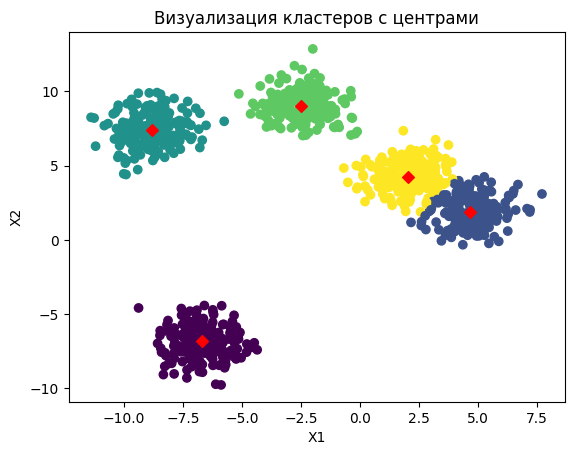

In [53]:
plt.scatter(df['X1'], df['X2'], c=km_model.labels_)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='D')
plt.title('Визуализация кластеров с центрами')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 6. Выведите сумму квадратов расстояний образцов до ближайшего центра кластера при помощи атрибута .inertia_

In [54]:
km_model.inertia_

4.34667620985637

### 7. Осуществите проверку правильности выбора гиперпараметра модели k-средних "количество кластеров" (n_clusters=5) методом локтя. Для этого постройте график зависимости количества кластеров от значения inertia_. Правильное количество кластеров будет тo, где построенная кривая имеет наиболее сильный излом ("локоть"), то есть то, после которого значение inertia_ перестаёт существенно снижаться.

In [55]:
inertias = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_scaled)
    inertia = model.inertia_
    inertias.append(inertia)
inertias

[69.60058933981239,
 18.737940086033863,
 7.348632231220325,
 4.34667620985637,
 4.038190275133151,
 3.689656100833342,
 3.3718758177655657,
 3.179857060621799]

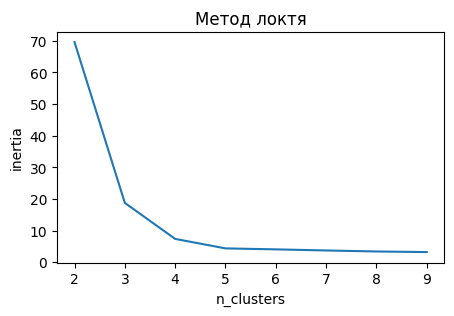

In [56]:
plt.figure(figsize=(5,3))
plt.plot(range(2, 10), inertias)
plt.title('Метод локтя')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [57]:
silhouette = silhouette_score(df, km_model.labels_)
silhouette

np.float64(0.6775046889706131)

# Метод DBSCAN.

### 1. Загрузите встроенный датасет iris. В качестве рассматриваемых данных, возьмите второй и третий столбцы датасета. Выведите данные в виде датафрейма c названиями колонок. 

In [58]:
iris = datasets.load_iris()
X = iris.data[:, [1,2]]
df = pd.DataFrame(X, columns=iris.feature_names[1:3])
df.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


### 2. Визуализируйте данные на диаграмме рассеяния.

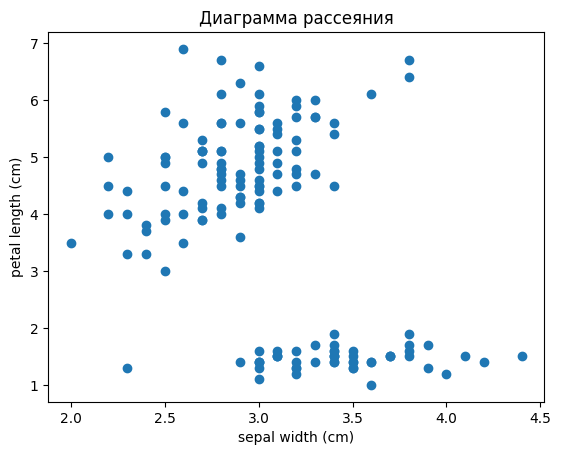

In [59]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Диаграмма рассеяния')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

### 3. Стандартизируйте данные при помощи StandardScaler.

In [60]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=df.columns).head()

,sepal width (cm),petal length (cm)
0,1.019004,-1.340227
1,-0.131979,-1.340227
2,0.328414,-1.397064
3,0.098217,-1.283389
4,1.249201,-1.340227


### 4. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.

In [61]:
dbscan_model = DBSCAN(eps=0.65, min_samples=8,n_jobs=-1)
dbscan_model.fit(X_scaled)
labels = dbscan_model.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 5. Выведите получившееся в результате работы алгоритма, количество кластеров.

In [62]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

### 6. Выведите количество наблюдений, отнесённых к шумам. Для шумов метка кластеров равна -1.

In [63]:
n_noise = list(labels).count(-1)
n_noise

4

### 7. Визуализируйте полученные кластеры и шумы, подкрасив их разными цветами. 

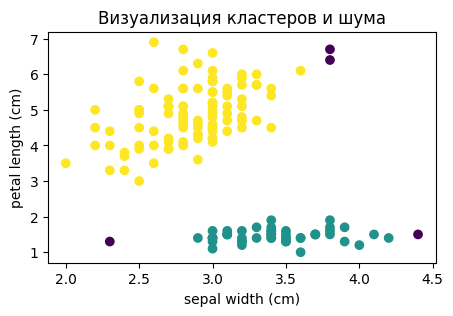

In [64]:
plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.title('Визуализация кластеров и шума')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [65]:
silhouette = silhouette_score(X, dbscan_model.labels_)
silhouette

np.float64(0.6639710599136929)

### Задания самостоятельного для выполнения:

### Метод k-means.
1. Загрузите прилагающийся датасет Mall_Customers.csv.
2. Оставьте в нём только два столбца Annual Income и Spending Score.
3. Масштабируйте данные при помощи StandardScaler.
4. Визуализируйте данные при помощи диаграммы рассеяния и сделайте предположение о количестве кластеров. 
5. Определите наилучшее число кластеров с помощью метода локтя.
6. Обучите модель k-средних с лучшим числом кластеров и предскажите метки кластеров для каждого значения из датасета.
7. Визуализируйте полученные кластеры разными цветами с изображением центров кластеров.
8. Оцените эффективность кластеризации с помощью метрики Silhouette Score.

In [66]:

data = pd.read_csv("Mall_Customers.csv")
data = data[["Annual Income (k$)", "Spending Score (1-100)"]]
data.columns = ["Annual_Income", "Spending_Score"] 
data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [67]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

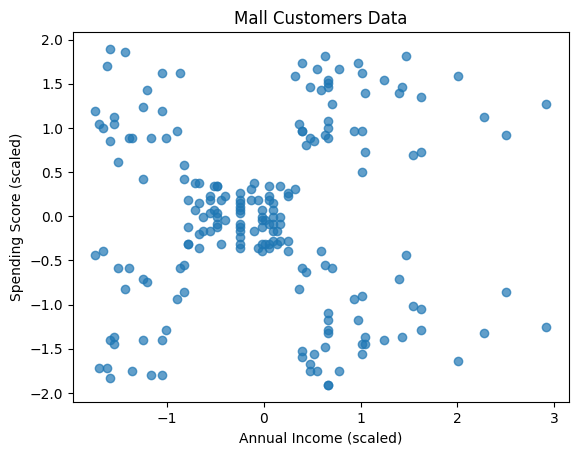

In [68]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.7)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Mall Customers Data")
plt.show()

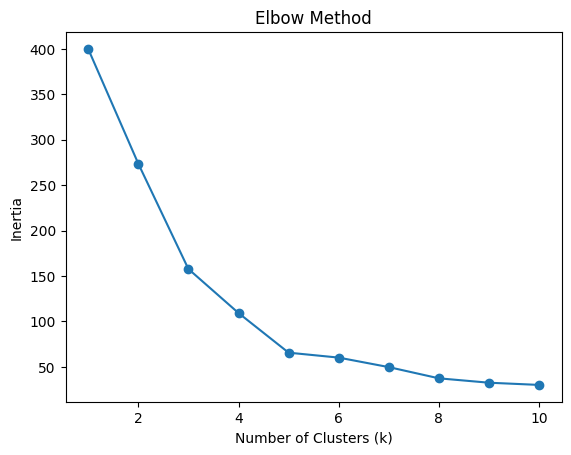

In [69]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [70]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

C:\Users\alexm\AppData\Local\Temp\ipykernel_23740\881814795.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


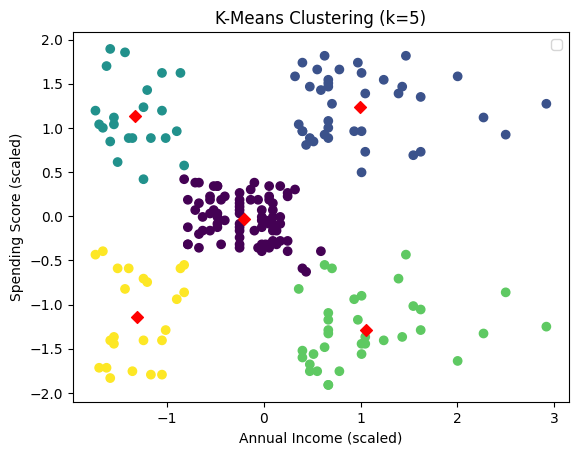

In [75]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="D")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering (k=5)")
plt.legend()
plt.show()

In [ ]:
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.555


### Метод DBSCAN.
1. Загрузите встроенный датасет iris. Выведите данные в виде датафрейма c названиями колонок. 
2. Стандартизируйте данные при помощи StandardScaler.
3. Создайте класс DBSCAN(n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.
4. Выведите получившееся в результате работы алгоритма, количество кластеров.
5. Выведите количество наблюдений, отнесённых к шумам. 
6. Оцените качество кластеризации при помощи метрики Silhouette Score.
7. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_. Оцените качество кластеризации при помощи метрики Silhouette Score и сделайте вывод о том, улучшилась ли работа алгоритма при изменении гиперпараметров модели. 
8. Повторите задание 7, используя Pipeline.

In [ ]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
dbscan = DBSCAN(n_jobs=-1) 
dbscan.fit(scaled_data)

dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [ ]:
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters

2

In [ ]:
n_noise = list(dbscan.labels_).count(-1)
n_noise

34

In [ ]:
score = silhouette_score(scaled_data, dbscan.labels_)
print("Silhouette Score:", score.round(3))

Silhouette Score: 0.357


In [ ]:
dbscan_tuned = DBSCAN(eps=0.65, min_samples=8, n_jobs=-1)
dbscan_tuned.fit(scaled_data)

print("Метки кластеров:", dbscan_tuned.labels_)

n_clusters_tuned = len(set(dbscan_tuned.labels_)) - (1 if -1 in dbscan_tuned.labels_ else 0)
print("Количество кластеров:", n_clusters_tuned)

n_noise_tuned = list(dbscan_tuned.labels_).count(-1)
print("Количество шума:", n_noise_tuned)

score_tuned = silhouette_score(scaled_data, dbscan_tuned.labels_)
print("Silhouette Score (tuned):", score_tuned.round(3))

Метки кластеров: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Количество кластеров: 2
Количество шума: 28
Silhouette Score (tuned): 0.381


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("dbscan", DBSCAN(eps=0.65, min_samples=8, n_jobs=-1))
])

# Обучаем и предсказываем
pipeline.fit(data)
labels_pipeline = pipeline.named_steps["dbscan"].labels_

# Оценка
score_pipeline = silhouette_score(scaled_data, labels_pipeline)
print("Silhouette Score (Pipeline):", score_pipeline.round(3))

Silhouette Score (Pipeline): 0.381
